In [8]:
# Expect this program to run for 30 minutes or more
# Load package
import numpy as np
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras

from numpy.random import seed
seed(100)


import matplotlib.pyplot as plt
from IPython.display import clear_output

n = norm.pdf
N = norm.cdf

In [9]:
# Load option data 
option_dataset = pd.read_csv('Option_Data.csv')
option_dataset.head()

,Spot price,Strike Price,Risk Free Rate,Volatility,Maturity,Dividend,Option Price,Noise,Option Price with Noise
0,55.84,72.592,0.013,0.276,1.78,0,3.569203,-0.262465,3.306738
1,57.96,34.776,0.033,0.171,0.85,0,24.146475,0.051402,24.197877
2,43.70,52.440,0.041,0.262,1.19,0,2.764509,0.172955,2.937464
3,54.44,65.328,0.041,0.289,1.63,0,5.529263,-0.037865,5.491398
4,53.42,58.762,0.037,0.322,1.20,0,6.357704,0.147198,6.504902


In [12]:
data = pd.read_csv('https://data.nasdaq.com/api/v3/datasets/CFTC/133741_FO_L_ALL.csv?api_key=NHjvHzY-3QyK3szU4-6c')
data.head(5)

,Date,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
0,2023-01-24,19441.0,13059.0,14661.0,3333.0,1475.0,457.0,17868.0,18451.0,1573.0,990.0
1,2023-01-17,17475.0,12536.0,13276.0,2384.0,1023.0,620.0,15944.0,16279.0,1531.0,1196.0
2,2023-01-10,16081.0,11945.0,12682.0,2179.0,586.0,480.0,14710.0,15341.0,1370.0,739.0
3,2023-01-03,15472.0,11638.0,11459.0,2422.0,291.0,660.0,14350.0,14540.0,1122.0,932.0
4,2022-12-27,17979.0,12546.0,12084.0,3838.0,276.0,1100.0,16660.0,17022.0,1319.0,957.0


In [11]:
data.sort_values(by="Date", inplace = True)
data.head(5)

,Date,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
250,2018-04-10,1702.0,1077.0,1315.0,26.0,0.0,0.0,1103.0,1341.0,599.0,361.0
249,2018-04-17,2029.0,1305.0,1645.0,42.0,0.0,0.0,1347.0,1687.0,682.0,342.0
248,2018-04-24,2380.0,1497.0,2018.0,54.0,0.0,0.0,1551.0,2072.0,829.0,308.0
247,2018-05-01,1991.0,1375.0,1631.0,27.0,0.0,0.0,1402.0,1658.0,589.0,333.0
246,2018-05-08,2485.0,1675.0,2075.0,20.0,0.0,0.0,1695.0,2095.0,790.0,390.0


In [3]:
option_dataset.shape

(10000, 9)

## Divide data into Training, Validation and Test set

In [4]:
# Include option price with and without noise in data set splitting for later BS mean error calculation on test set
y = option_dataset[['Option Price with Noise','Option Price']]
X = option_dataset[['Spot price', 'Strike Price', 'Risk Free Rate','Volatility','Maturity','Dividend']]

# Divide data into training set and test set(note that random seed is set)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=100)

## Feature Scaling

In [5]:
# Scale features based on Z-Score
scaler = StandardScaler()
scaler.fit(X_train)


X_scaled_train = scaler.transform(X_train)
X_scaled_vals = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [12]:
X_scaled_test

array([[ 0.20048863, -0.76828793,  1.12379327,  0.20937565,  1.51737411,
         0.        ],
       [-0.76768186,  0.15355115,  0.15745553,  0.71694367,  0.50973193,
         0.        ],
       [ 1.45300469, -0.44571164,  0.50257615,  0.07094801,  0.01578969,
         0.        ],
       ...,
       [-0.97003822, -1.35509951,  0.36452791,  0.83230004, -0.10275645,
         0.        ],
       [ 1.52278274, -1.1818736 , -1.08497871,  1.70900844, -0.81403328,
         0.        ],
       [ 0.48657865, -0.01672241, -0.87790634, -0.65579711,  0.45045886,
         0.        ]])

In [13]:
y_train

array([[11.88144989, 12.11968909],
       [ 0.69142715,  0.68451805],
       [ 4.4875732 ,  4.59603217],
       ...,
       [ 8.59620294,  8.39249039],
       [ 3.13313922,  3.51318808],
       [ 0.23888965,  0.08193964]])

## Define Neural Network

In [6]:
# Base model
model = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (6,)),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                Dense(1)])

# Changing the number of hidden layers
two_layers = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (6,)),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                Dense(1)])

three_layers = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (6,)),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                Dense(1)])

# Changing the number of neurons
fewer_neurons = keras.models.Sequential([Dense(10,activation = "sigmoid",input_shape = (6,)),
                                 Dense(10,activation = "sigmoid"),Dense(10,activation = "sigmoid"),
                                Dense(1)])

more_neurons = keras.models.Sequential([Dense(10,activation = "sigmoid",input_shape = (6,)),
                                 Dense(10,activation = "sigmoid"),Dense(10,activation = "sigmoid"),
                                Dense(1)])

# List for all the models
models = [model, two_layers, three_layers, fewer_neurons, more_neurons]

## Reviewing sequential models

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
more_neurons.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                70        
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Compile, fit and train all models

In [9]:
# Complie function allows you to choose your measure of loss and optimzer
for mdl in models:
    mdl.compile(loss = "mae",optimizer = "Adam")

# Create checkpoints abd early stop files for each model
checkpoints, early_stops = [], []
for n, mdl in enumerate(models, 1):
    checkpoints.append(keras.callbacks.ModelCheckpoint("Model " + str(n) + ".h5",save_best_only = True))
    early_stops.append(keras.callbacks.EarlyStopping(patience = 5000,restore_best_weights = True))
    
# Training with callback
history_ = []
for ind, mdl in enumerate(models, 0): 
    history_.append(mdl.fit(X_scaled_train,y_train[:,0],epochs= 100,verbose = 0, validation_data=(X_scaled_vals,y_val[:,0]),
                callbacks=[checkpoints[ind],early_stops[ind]]))

## Calculate prediction error for both NN and BS analytical formula

In [10]:
# Load the best models saved and calcuate MAE for testing set for each case
model_names = ["Model " + str(i) for i in range(1,6)]
mae_test_vals, mean_error, std_error, mean_error_vs_BS_price, std_error_vs_BS_price, BS_mean_error, BS_std_error = [],[],[],[],[],[],[]

for ind, mdl in enumerate(models, 0):
    temp_model = keras.models.load_model(str(model_names[ind])+".h5")
    mae_test_vals.append(mdl.evaluate(X_scaled_test,y_test[:,0],verbose=0))

    # Obtain each models predictions
    model_prediction = mdl.predict(X_scaled_test)

    # Black Scholes Statistics
    mean_error.append(np.average(model_prediction.T - y_test[:,0])) # Mean error on test set
    std_error.append(np.std(model_prediction.T - y_test[:,0])) # Standard deviation of error on test set

    # Neural Network Statistics
    mean_error_vs_BS_price.append(np.average(model_prediction.T - y_test[:,1])) # Mean error on test set vs. option price with noise
    std_error_vs_BS_price.append(np.std(model_prediction.T - y_test[:,1])) # Standard deviation of error on test set vs. option price with noise
    BS_mean_error.append(np.average(y_test[:,0] - y_test[:,1])) # Mean error on test set vs. BS analytical formula price
    BS_std_error.append(np.std(y_test[:,0] - y_test[:,1]))# Standard deviation of error on test set vs. BS analytical formula price

63/63 [==============================] - 0s 436us/step


## Results

In [11]:
# Naming conventions
model_tags = ["Base", "Add 1 Hidden Layers", "Add 2 Hidden Layers", "Reduced Neurons", "Increased Neurons"]
metrics_tags = ["MAE test values", "Mean Error", "Std error", "Mean error vs BS price", "Std error vs BS price", "BS mean error", "BS std error"]

# Map variables
res_ = list(zip(mae_test_vals, mean_error, std_error, mean_error_vs_BS_price, std_error_vs_BS_price, BS_mean_error, BS_std_error))
results = pd.DataFrame(res_, index=model_tags, columns = metrics_tags)

# Print results
results

,MAE test values,Mean Error,Std error,Mean error vs BS price,Std error vs BS price,BS mean error,BS std error
Base,0.227805,0.007613,0.307680,0.012994,0.271133,0.005381,0.148234
Add 1 Hidden Layers,0.226221,0.066700,0.305566,0.072082,0.269289,0.005381,0.148234
Add 2 Hidden Layers,0.257275,-0.095267,0.317087,-0.089886,0.280478,0.005381,0.148234
Reduced Neurons,0.242699,0.018299,0.331208,0.023680,0.297051,0.005381,0.148234
Increased Neurons,0.240317,0.017582,0.319851,0.022964,0.285001,0.005381,0.148234


Model 1: Base


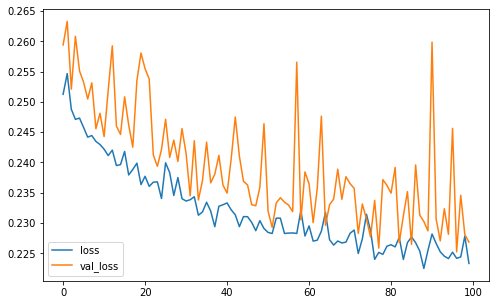

Model 2: Add 1 Hidden Layers


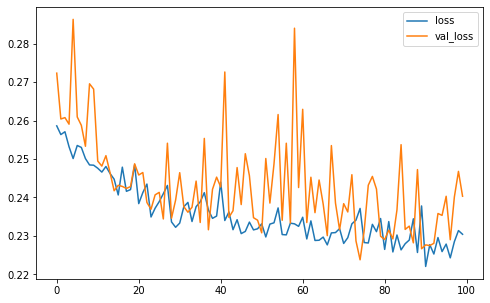

Model 3: Add 2 Hidden Layers


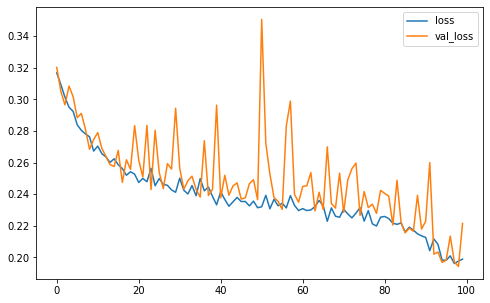

Model 4: Reduced Neurons


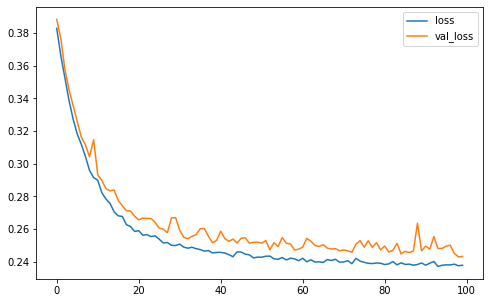

Model 5: Increased Neurons


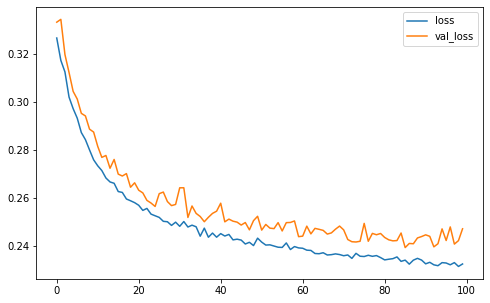

In [ ]:
# Plot training history
for n, hist in enumerate(history_, 0): 
    print("Model " + str(n+1) + ": "+ str(model_tags[n])) 
    pd.DataFrame(hist.history).plot(figsize=(8,5))
    plt.show()